# 오마이걸 승희와 지호에게 고양이 스티커 붙이기

### 1. 승희한테 고양이 수염 스티커 붙이기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
img_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (640, 360))
img_show = img.copy() 

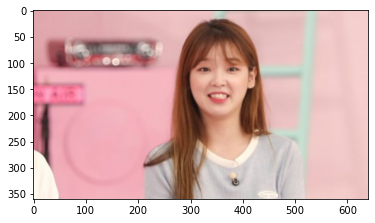

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언


In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)


rectangles[[(306, 80) (414, 187)]]


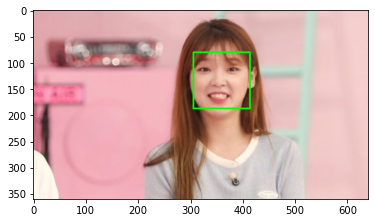

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


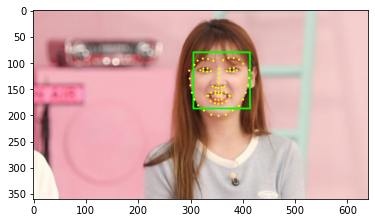

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[51]) # nose center index : 30
    x1 = (landmark[0][0] + landmark[1][0] + landmark[17][0]) //3 
    y1 = (landmark[19][1] + landmark[18][1] + landmark[17][1]) //3
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x1,y1))
    print ('(w,h) : (%d,%d)'%(w,h))

(354, 156)
(x,y) : (301,97)
(w,h) : (109,109)


In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(109, 109, 3)


In [12]:
refined_x = int(x1) # left
refined_y = int(y1)      # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (301,97)


In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

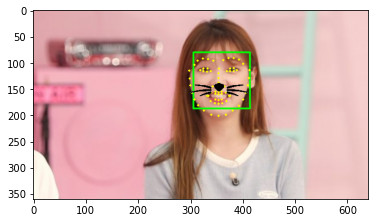

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

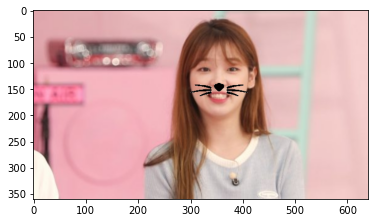

In [15]:
sticker_area = img[y1:y1+img_sticker.shape[0], x1:x1+img_sticker.shape[1]]
img[y1:y1+img_sticker.shape[0], x1:x1+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

내가 제일 많이 애를 먹었던 부분은 우선적으로 스티커 작동방식에 대해서 많이 헤맸다.. 조원들과 주위 분들에게 조언을 얻고 시도한 끝에 적절한 위치에 스티커가 붙여졌다.

### 2. 지호에게 고양이 수염 스티커 붙이기

In [16]:
def make_sticker_1(img_path, sticker_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (640, 480))
    img_show = img.copy()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x1 = (landmark[0][0] + landmark[1][0] + landmark[17][0]) //3 
        y1 = (landmark[19][1] + landmark[18][1] + landmark[17][1]) //3
        w = dlib_rect.width()
        h = dlib_rect.width()
        
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    refined_x = int(x1) # left
    refined_y = int(y1)
    
    
    sticker_area = img[y1:y1+img_sticker.shape[0], x1:x1+img_sticker.shape[1]]
    img[y1:y1+img_sticker.shape[0], x1:x1+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
                
    

    
    

In [17]:
def make_sticker_2(img_path, sticker_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (640, 480))
    img_show = img.copy()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x1 = (landmark[0][0] + landmark[1][0] + landmark[18][0]) //3 
        y1 = (landmark[19][1] + landmark[18][1] + landmark[24][1]) // 4
        w = dlib_rect.width()
        h = dlib_rect.width()
        
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    refined_x = int(x1) # left
    refined_y = int(y1)
    
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
    sticker_area = img[y1:y1+img_sticker.shape[0], x1:x1+img_sticker.shape[1]]
    img[y1:y1+img_sticker.shape[0], x1:x1+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    

### 1과 2의 차이는 해상도의 차이의 차이가 있다. 어떤 사진 같은 경우 사진이 퍼지게 나와 face detection이 되지 않는다.

### 지호 정면 사진

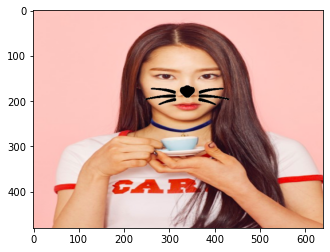

In [18]:
img_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/jiho.jpg'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
make_sticker_2(img_path, sticker_path)

### 지호의 거리가 있는 사진

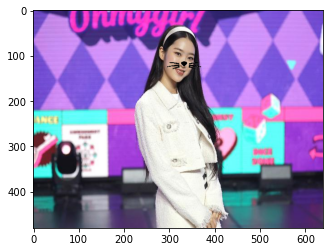

In [19]:
img_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/jiho2.jpg'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
make_sticker_1(img_path, sticker_path)

### 지호의 정면사진 2

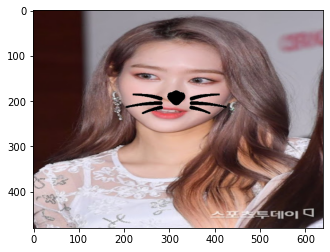

In [21]:
img_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/jiho3.jpg'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
make_sticker_2(img_path, sticker_path)

### 지호의 다른 각도 사진

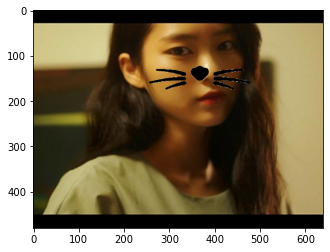

In [22]:
img_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/jiho5.jpg'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
make_sticker_2(img_path, sticker_path)

### 누워 있는 지호 사진

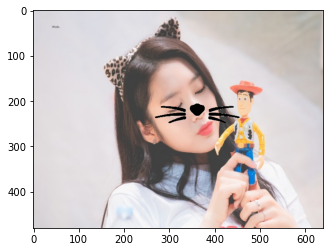

In [23]:
img_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/jiho6.jpg'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
make_sticker_2(img_path, sticker_path)

### 대부분 위치는 잘 포착했지만 각도가 달라지는 경우 스티커는 위치가 달라지면서 어색해진다. 누워있는 사진 같은 경우에는 회전이 제대로 되지 않은 상태이다. 이 상태로 앱을 출시하게 된다면 동적인 상황에서 캐치하지 못해 문제가 생길 가능성이 농후하다.

### (부록) 원빈에게 고양이 코수염을 붙인다면?

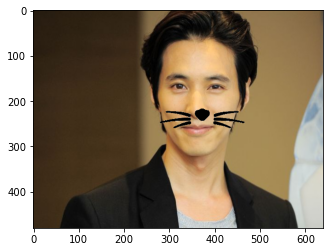

In [24]:
img_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/wonbin.jpeg'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
make_sticker_1(img_path, sticker_path)

### 위치가 살짝 틀어지게 나온다. 